# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv',nrows=50000)
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [9]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
import num2words
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub(r"(\d+)", lambda x: num2words.num2words(int(x.group(0))), sent)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████| 50000/50000 [00:48<00:00, 1023.44it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun six year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [18]:
# similarly you can preprocess the titles also
# Combining all the above statemennts 
#Replacing number with text https://stackoverflow.com/questions/40040177/search-and-replace-numbers-with-words-in-file
#re.sub(r"(\d+)", lambda x: num2words.num2words(int(x.group(0))), sent)
from tqdm import tqdm
import num2words
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub(r"(\d+)", lambda x: num2words.num2words(int(x.group(0))), sent)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|█████████████████████████████████| 50000/50000 [00:02<00:00, 22516.68it/s]


In [19]:
#process project grade remove replace space with _ and replace - with _
preprocessed_grade = []
for sentance in  tqdm(project_data['project_grade_category'].values):
    sentance=sentance.replace(" ","_")
    sentance = sentance.replace("-","_")
    preprocessed_grade.append(sentance)
list(set(preprocessed_grade))

100%|████████████████████████████████| 50000/50000 [00:00<00:00, 561403.81it/s]


['Grades_PreK_2', 'Grades_6_8', 'Grades_9_12', 'Grades_3_5']

<h2><font color='red'> 1.4.1 Combining Resource data and project data`</font></h2>

In [20]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
print(project_data.columns)
project_data = pd.merge(project_data, price_data, on='id', how='left')
print(project_data.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')
Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')


<h2><font color='red'> 1.4.2 Finding wordcount of essay and title and Sentiment Analysis of essay`</font></h2>

In [21]:
project_data['essay'] = preprocessed_essays
project_data['project_title']= preprocessed_title
project_data['project_grade_category']=preprocessed_grade
project_data['title_wordcount'] = project_data.project_title.apply(lambda x: len(str(x).split(' ')))
project_data['essay_wordcount'] = project_data.essay.apply(lambda x: len(str(x).split(' ')))


In [22]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sentiment_value=[]
sid = SentimentIntensityAnalyzer()
for essay in tqdm(project_data['essay']):
    senti_score = sid.polarity_scores(essay)
    # we can use these 4 things as features/attributes (neg, neu, pos, compound)
    # neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93
    
    sentiment_value.append(int(senti_score['pos'] *100) )

project_data['essay_sentiment_score'] = sentiment_value

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\5558\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|███████████████████████████████████| 50000/50000 [02:28<00:00, 337.58it/s]


<h2><font color='red'>[1.4.3] Splitting data into Train and cross validation(or test): Stratified Sampling</font></h2>

In [23]:
# train test split
y_label= project_data['project_is_approved']
X_label = project_data.drop(columns='project_is_approved')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size=0.33, stratify=y_label)


In [24]:
print(X_train.shape)
print(X_test.shape)


(33500, 22)
(16500, 22)


In [25]:
X_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'quantity', 'title_wordcount',
       'essay_wordcount', 'essay_sentiment_score'],
      dtype='object')

## 1.5 Preparing data for models

In [26]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'title_wordcount', 'essay_wordcount', 'essay_sentiment_score'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [27]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_categories_ohc = vectorizer.transform(X_train['clean_categories'].values)
#X_cv_categories_ohc = vectorizer.transform(X_cv['clean_categories'].values)
X_test_categories_ohc = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_categories_ohc.shape, y_train.shape)
#print(X_cv_categories_ohc.shape, y_cv.shape)
print(X_test_categories_ohc.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 9) (33500,)
(16500, 9) (16500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [28]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_sub_categories_ohc = vectorizer.transform(X_train['clean_subcategories'].values)
#X_cv_sub_categories_ohc = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_sub_categories_ohc = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_sub_categories_ohc.shape, y_train.shape)
#print(X_cv_sub_categories_ohc.shape, y_cv.shape)
print(X_test_sub_categories_ohc.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 30) (33500,)
(16500, 30) (16500,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [29]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
#X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
#print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 51) (33500,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [30]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values.astype('U')) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values.astype('U'))
#X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values.astype('U'))
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values.astype('U'))

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
#print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 5) (33500,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [31]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
#X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
#print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 4) (33500,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [32]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#BoW
preprocessed_essays =X_train['essay'].astype('U')
count_vect = CountVectorizer(ngram_range=(1,2),min_df=10,max_features=5000) #in scikit-learn
count_vect.fit(preprocessed_essays)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

x_essay_bow1 = count_vect.transform(preprocessed_essays.astype('U'))
#cv_essay_bow1 = count_vect.transform(X_cv['essay'].astype('U'))
essay_bow1 = count_vect.transform(X_test['essay'].astype('U'))
print("the type of count vectorizer ",type(essay_bow1))
print("the shape of out text BOW vectorizer ",essay_bow1.get_shape())
print("the number of unique words ", essay_bow1.get_shape()[1])


#Normalization of BOW
from sklearn.preprocessing import Normalizer
w_normalized = Normalizer()

w_normalized.fit(x_essay_bow1)

x_essay_bow = w_normalized.transform(x_essay_bow1)
#cv_essay_bow = w_normalized.transform(cv_essay_bow1)
essay_bow = w_normalized.transform(essay_bow1)

some feature names  ['abilities', 'ability', 'ability learn', 'ability levels', 'able', 'able access', 'able choose', 'able complete', 'able control', 'able create']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (16500, 5000)
the number of unique words  5000


In [33]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
preprocessed_title =X_train['project_title'].astype('U')
count_vect = CountVectorizer(ngram_range=(1,2),min_df=10,max_features=5000) #in scikit-learn
count_vect.fit(preprocessed_title)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

x_title_bow1 = count_vect.transform(preprocessed_title)
#cv_title_bow1 = count_vect.transform(X_cv['project_title'].astype('U'))
title_bow1 = count_vect.transform(X_test['project_title'].astype('U'))
print("the type of count vectorizer ",type(title_bow1))
print("the shape of out title BOW vectorizer ",title_bow1.get_shape())
print("the number of unique words ", title_bow1.get_shape()[1])

#Normalization of BOW title
from sklearn.preprocessing import Normalizer
w_normalized = Normalizer()

w_normalized.fit(x_title_bow1)

x_title_bow = w_normalized.transform(x_title_bow1)
#cv_title_bow = w_normalized.transform(cv_title_bow1)
title_bow = w_normalized.transform(title_bow1)

some feature names  ['abc', 'about', 'about it', 'about our', 'about reading', 'academic', 'academic success', 'academics', 'access', 'access technology']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out title BOW vectorizer  (16500, 2732)
the number of unique words  2732


#### 1.5.2.2 TFIDF vectorizer

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
preprocessed_essays =X_train['essay']
vectorizer = TfidfVectorizer(ngram_range=(1,2),min_df=10,max_features=5000)
vectorizer.fit_transform(preprocessed_essays.astype('U'))
print("Shape of matrix after one hot encodig ",vectorizer.get_feature_names()[:10])
print('='*50)

x_essay_tfidf1 = vectorizer.transform(preprocessed_essays.astype('U'))
#cv_essay_tfidf1= vectorizer.transform(X_cv['essay'].astype('U'))
essay_tfidf1 = vectorizer.transform(X_test['essay'].astype('U'))
print("the type of count vectorizer ",type(essay_tfidf1))
print("the shape of out text tfidf vectorizer ",essay_tfidf1.get_shape())
print("the number of unique words ", essay_tfidf1.get_shape()[1])


#Normalization of TfIdf
from sklearn.preprocessing import Normalizer
w_normalized = Normalizer()

w_normalized.fit(x_essay_tfidf1)

x_essay_tfidf = w_normalized.transform(x_essay_tfidf1)
#cv_essay_tfidf = w_normalized.transform(cv_essay_tfidf1)
essay_tfidf = w_normalized.transform(essay_tfidf1)

Shape of matrix after one hot encodig  ['abilities', 'ability', 'ability learn', 'ability levels', 'able', 'able access', 'able choose', 'able complete', 'able control', 'able create']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text tfidf vectorizer  (16500, 5000)
the number of unique words  5000


In [35]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
preprocessed_title =X_train['project_title'].astype('U')
vectorizer = TfidfVectorizer(ngram_range=(1,2),min_df=10,max_features=5000)
vectorizer.fit_transform(preprocessed_title)
print("some feature names ", vectorizer.get_feature_names()[:10])
print('='*50)

x_title_tfidf1 = vectorizer.transform(preprocessed_title)
#cv_title_tfidf1 = vectorizer.transform(X_cv['project_title'].astype('U'))
title_tfidf1 = vectorizer.transform(X_test['project_title'].astype('U'))
print("the type of count vectorizer ",type(title_tfidf1))
print("the shape of out title tfidf vectorizer ",title_tfidf1.get_shape())
print("the number of unique words ", title_tfidf1.get_shape()[1])


#Normalization of TfIdf title
from sklearn.preprocessing import Normalizer
w_normalized = Normalizer()

w_normalized.fit(x_title_tfidf1)

x_title_tfidf = w_normalized.transform(x_title_tfidf1)
#cv_title_tfidf = w_normalized.transform(cv_title_tfidf1)
title_tfidf = w_normalized.transform(title_tfidf1)


some feature names  ['abc', 'about', 'about it', 'about our', 'about reading', 'academic', 'academic success', 'academics', 'access', 'access technology']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out title tfidf vectorizer  (16500, 2732)
the number of unique words  2732


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [36]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [37]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [38]:
# average Word2Vec
# compute average word2vec for each review.
def computeAvgW2V(list_of_sentance):
    avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(list_of_sentance): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    print(len(avg_w2v_vectors))
    print(len(avg_w2v_vectors[0]))
    return avg_w2v_vectors

In [39]:
preprocessed_essays =X_train['essay'].astype('U')
list_of_sentance=[]
for sentance in preprocessed_essays:
    list_of_sentance.append(sentance)
      
test_list_of_sentance=[]
for sentance in X_test['essay'].astype('U'):
    test_list_of_sentance.append(sentance)
    
x_essay_avg1  = computeAvgW2V(list_of_sentance)  
essay_avg1 = computeAvgW2V(test_list_of_sentance)  

'''
cv_list_of_sentance=[]
for sentance in X_cv['essay'].astype('U'):
    cv_list_of_sentance.append(sentance)
cv_essay_avg1 = computeAvgW2V(cv_list_of_sentance)
'''
    
#Normalization of AvgW2V
from sklearn.preprocessing import Normalizer
w_normalized = Normalizer()

w_normalized.fit(x_essay_avg1)

x_essay_avg = w_normalized.transform(x_essay_avg1)
#cv_essay_avg = w_normalized.transform(cv_essay_avg1)
essay_avg = w_normalized.transform(essay_avg1)

100%|██████████████████████████████████| 33500/33500 [00:15<00:00, 2118.21it/s]


33500
300


100%|██████████████████████████████████| 16500/16500 [00:08<00:00, 2036.09it/s]


16500
300


In [40]:
preprocessed_title =X_train['project_title']
list_of_title=[]
for sentance in preprocessed_title:
    list_of_title.append(sentance)
    
test_list_of_title=[]
for sentance in X_test['project_title']:
    test_list_of_title.append(sentance)
    
x_title_avg1  = computeAvgW2V(list_of_sentance)  
title_avg1 = computeAvgW2V(test_list_of_sentance) 

'''
cv_list_of_title=[]
for sentance in X_cv['project_title']:
    cv_list_of_title.append(sentance)
cv_title_avg1 = computeAvgW2V(cv_list_of_sentance)

'''
#Normalization of AvgW2V title
from sklearn.preprocessing import Normalizer
w_normalized = Normalizer()

w_normalized.fit(x_title_avg1)

x_title_avg = w_normalized.transform(x_title_avg1)
#cv_title_avg = w_normalized.transform(cv_title_avg1)
title_avg = w_normalized.transform(title_avg1)

100%|██████████████████████████████████| 33500/33500 [00:17<00:00, 1889.07it/s]


33500
300


100%|██████████████████████████████████| 16500/16500 [00:07<00:00, 2133.85it/s]


16500
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [41]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
preprocessed_essays =X_train['essay'].astype('U')
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [42]:
# average Word2Vec
# compute average word2vec for each review.
def computeTfIdf(list_of_sentance):
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    row=0;
    for sentence in tqdm(list_of_sentance): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            if word in glove_words and word in tfidf_words:
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sent.count(word)/len(sent)) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
        row +=1;
    return tfidf_w2v_vectors
    

In [43]:
preprocessed_essays =X_train['essay'].astype('U')
list_of_sentance=[]
for sentance in preprocessed_essays:
    list_of_sentance.append(sentance.split())
    
test_list_of_sentance=[]
for sentance in X_test['essay'].astype('U'):
    test_list_of_sentance.append(sentance.split())

x_essay_tfidf_avg1  = computeTfIdf(list_of_sentance)  
essay_tfidf_avg1= computeTfIdf(test_list_of_sentance) 

'''
cv_list_of_sentance=[]
for sentance in X_cv['essay'].astype('U'):
    cv_list_of_sentance.append(sentance.split())
cv_essay_tfidf_avg1 = computeTfIdf(cv_list_of_sentance)
'''   
#Normalization of TfIdfW2V
from sklearn.preprocessing import Normalizer
w_normalized = Normalizer()

w_normalized.fit(x_essay_tfidf_avg1)

x_essay_tfidf_avg = w_normalized.transform(x_essay_tfidf_avg1)
#cv_essay_tfidf_avg = w_normalized.transform(cv_essay_tfidf_avg1)
essay_tfidf_avg = w_normalized.transform(essay_tfidf_avg1)

100%|█████████████████████████████████| 16500/16500 [00:00<00:00, 85876.97it/s]


TFIDF weighted W2V title

In [44]:
# Similarly you can vectorize for title also
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
preprocessed_title =X_train['project_title'].astype('U')
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [45]:
# average Word2Vec
# compute average word2vec for each review.
def computeTfIdf(list_of_sentance):
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    row=0;
    for sentence in tqdm(list_of_sentance): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            if word in glove_words and word in tfidf_words:
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sent.count(word)/len(sent)) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
        row +=1;
    return tfidf_w2v_vectors

In [46]:
preprocessed_title =X_train['project_title'].astype('U')
list_of_title=[]
for sentance in preprocessed_title:
    list_of_title.append(sentance)
    
test_list_of_title=[]
for sentance in X_test['project_title'].astype('U'):
    test_list_of_title.append(sentance)
    
x_title_tfidf_avg1  = computeTfIdf(list_of_sentance)  
title_tfidf_avg1 = computeTfIdf(test_list_of_sentance)  

'''
cv_list_of_title=[]
for sentance in X_cv['project_title'].astype('U'):
    cv_list_of_title.append(sentance)
cv_title_tfidf_avg1 = computeTfIdf(cv_list_of_sentance)
'''

#Normalization of AvgW2V
from sklearn.preprocessing import Normalizer
w_normalized = Normalizer()

w_normalized.fit(x_title_tfidf_avg1)

x_title_tfidf_avg = w_normalized.transform(x_title_tfidf_avg1)
#cv_title_tfidf_avg = w_normalized.transform(cv_title_tfidf_avg1)
title_tfidf_avg = w_normalized.transform(title_tfidf_avg1)



100%|█████████████████████████████████| 16500/16500 [00:00<00:00, 85877.82it/s]


### 1.5.3 Vectorizing Numerical features

In [47]:
#1) For normalizing numerical data, we have to use reshape(1,-1) instead of (-1,1). 
#2) Normalizer by default normalizes on each sample(row).StandardScaler standardises on each feature(column).
#3) If we use (-1,1) it means any number of rows and one column. So that makes normalizer on each row containing one column.This makes the value 1.
#4) If we use (-1, 1) then  all your prices are 1. It wont be useful at all.  
#5) Note: If the shape mismatch is the problem for not using (1,-1) you can reshape into (-1,1) again after normalization is done.
#6) see the below example given in the comments
'''
Ex:
After (-1,1) array is [[1],[2],[3]]
Using normalizer results in
[[1/1],[2/2],[3/3]] = [[1],[1],[1]]
If you use (1,-1) array is [1,2,3]
result is
[1/sqrt(14) , 2/sqrt(14) , 3/sqrt(14) ] = [0.26,0.52, 0.78]

'''

from sklearn.preprocessing import Normalizer
price_norm = Normalizer()

price_norm.fit(X_train['price'].values.reshape(1,-1))

train_price_norm = price_norm.transform(X_train['price'].values.reshape(1,-1)).T
test_price_norm = price_norm.transform(X_test['price'].values.reshape(1,-1)).T

print(train_price_norm.shape)
print(train_price_norm)


(33500, 1)
[[4.42950612e-03]
 [9.33798861e-04]
 [1.70888837e-03]
 ...
 [1.95999778e-03]
 [2.93059716e-03]
 [5.70806771e-05]]


In [48]:
from sklearn.preprocessing import Normalizer
quantity_norm = Normalizer()

quantity_norm.fit(X_train['quantity'].values.reshape(1,-1))

train_quantity_norm = quantity_norm.transform(X_train['quantity'].values.reshape(1,-1)).T
test_quantity_norm = quantity_norm.transform(X_test['quantity'].values.reshape(1,-1)).T

print(train_quantity_norm.shape)
print(train_quantity_norm)

(33500, 1)
[[0.00035052]
 [0.00105156]
 [0.0017526 ]
 ...
 [0.01261874]
 [0.00192786]
 [0.01051562]]


In [49]:
from sklearn.preprocessing import Normalizer
prev_proj_norm = Normalizer()

prev_proj_norm.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

train_prev_proj_norm = prev_proj_norm.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).T
test_prev_proj_norm = prev_proj_norm.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).T


print(train_prev_proj_norm.shape)
print(train_prev_proj_norm)

(33500, 1)
[[0.00560639]
 [0.00018085]
 [0.        ]
 ...
 [0.01446809]
 [0.        ]
 [0.00397873]]


In [50]:
from sklearn.preprocessing import Normalizer
senti_norm = Normalizer()

senti_norm.fit(X_train['essay_sentiment_score'].values.reshape(1,-1))

train_senti_norm = senti_norm.transform(X_train['essay_sentiment_score'].values.reshape(1,-1)).T
test_senti_norm = senti_norm.transform(X_test['essay_sentiment_score'].values.reshape(1,-1)).T


print(train_senti_norm.shape)
print(train_senti_norm)

(33500, 1)
[[0.00907474]
 [0.00725979]
 [0.00403322]
 ...
 [0.00322658]
 [0.00604983]
 [0.00403322]]


In [51]:
from sklearn.preprocessing import Normalizer
tile_wordcount_norm = Normalizer()

tile_wordcount_norm.fit(X_train['title_wordcount'].values.reshape(1,-1))

train_title_wordcount_norm = tile_wordcount_norm.transform(X_train['title_wordcount'].values.reshape(1,-1)).T
test_title_wordcount_norm = tile_wordcount_norm.transform(X_test['title_wordcount'].values.reshape(1,-1)).T


print(train_title_wordcount_norm.shape)
print(train_title_wordcount_norm)

(33500, 1)
[[0.00347553]
 [0.00347553]
 [0.00347553]
 ...
 [0.00347553]
 [0.00463404]
 [0.00579255]]


In [52]:
from sklearn.preprocessing import Normalizer
essay_wordcount_norm = Normalizer()

essay_wordcount_norm.fit(X_train['essay_wordcount'].values.reshape(1,-1))

train_essay_wordcount_norm = essay_wordcount_norm.transform(X_train['essay_wordcount'].values.reshape(1,-1)).T
test_essay_wordcount_norm = essay_wordcount_norm.transform(X_test['essay_wordcount'].values.reshape(1,-1)).T


print(train_essay_wordcount_norm.shape)
print(train_essay_wordcount_norm)

(33500, 1)
[[0.0037275 ]
 [0.00425005]
 [0.00919683]
 ...
 [0.00735049]
 [0.0070718 ]
 [0.00407587]]


### 1.5.4 Apply TruncatedSVD on TfidfVectorizer of essay text

In [54]:
from sklearn.decomposition import TruncatedSVD

index = [5,10,50,100,250,500,1000,2500,2900]
variance_sum = []

for i in tqdm(index):
    svd = TruncatedSVD(n_components=i, n_iter= 5, random_state=5)
    svd.fit(x_essay_tfidf)
    variance_sum.append(svd.explained_variance_ratio_.sum())
    
for i in range(len(index)):
    print(index[i], "= ",variance_sum[i])


100%|███████████████████████████████████████████| 9/9 [15:27<00:00, 214.78s/it]


5 =  0.03047162090922561
10 =  0.0516013323863125
50 =  0.13348861877899906
100 =  0.19531490320183192
250 =  0.31634539927395733
500 =  0.4460568545483957
1000 =  0.6063311537991225
2500 =  0.8467259505644127
2900 =  0.8857404006673639


using 2900 features will cover 88% so we are going to use that

In [55]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2900, n_iter= 5, random_state=5)
svd.fit(x_essay_tfidf)
print(svd.explained_variance_ratio_.sum())
train_svd= svd.transform(x_essay_tfidf)
test_svd= svd.transform(essay_tfidf)

0.8857404006673639


### 1.5.5 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [56]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
train_bow = hstack((X_train_categories_ohc, X_train_sub_categories_ohc,X_train_state_ohe,X_train_teacher_ohe, X_train_grade_ohe,
                    train_price_norm,train_quantity_norm,train_prev_proj_norm, x_essay_bow,x_title_bow))
print(train_bow.shape)

test_bow = hstack((X_test_categories_ohc, X_test_sub_categories_ohc,X_test_state_ohe,X_test_teacher_ohe, X_test_grade_ohe,
                    test_price_norm,test_quantity_norm,test_prev_proj_norm,essay_bow,title_bow))
print(test_bow.shape)

(33500, 7834)
(16500, 7834)


In [57]:
#set 2
train_tfidf = hstack((X_train_categories_ohc, X_train_sub_categories_ohc,X_train_state_ohe,X_train_teacher_ohe, X_train_grade_ohe,
                      train_price_norm,train_quantity_norm,train_prev_proj_norm,x_essay_tfidf,x_title_tfidf))
print(train_tfidf.shape)

test_tfidf = hstack((X_test_categories_ohc, X_test_sub_categories_ohc,X_test_state_ohe,X_test_teacher_ohe, X_test_grade_ohe,
                     test_price_norm,test_quantity_norm,test_prev_proj_norm,essay_tfidf,title_tfidf))
print(test_tfidf.shape)

(33500, 7834)
(16500, 7834)


In [58]:
#set 3
train_avg = hstack((X_train_categories_ohc, X_train_sub_categories_ohc,X_train_state_ohe,X_train_teacher_ohe, X_train_grade_ohe,
                    train_price_norm,train_quantity_norm,train_prev_proj_norm,x_essay_avg,x_title_avg))
print(train_avg.shape)

test_avg = hstack((X_test_categories_ohc, X_test_sub_categories_ohc,X_test_state_ohe,X_test_teacher_ohe, X_test_grade_ohe,
                   test_price_norm,test_quantity_norm,test_prev_proj_norm,essay_avg,title_avg))
print(test_avg.shape)

(33500, 702)
(16500, 702)


In [59]:
#set 4
train_tfidf_avg = hstack((X_train_categories_ohc, X_train_sub_categories_ohc,X_train_state_ohe,X_train_teacher_ohe, X_train_grade_ohe,
                          train_price_norm,train_quantity_norm,train_prev_proj_norm,x_essay_tfidf_avg,x_title_tfidf_avg))
print(train_tfidf_avg.shape)

test_tfidf_avg = hstack((X_test_categories_ohc, X_test_sub_categories_ohc,X_test_state_ohe,X_test_teacher_ohe, X_test_grade_ohe,
                         test_price_norm,test_quantity_norm,test_prev_proj_norm,essay_tfidf_avg,title_tfidf_avg))
print(test_tfidf_avg.shape)

(33500, 702)
(16500, 702)


In [60]:
#Set 5

train_set5 = hstack((X_train_categories_ohc, X_train_sub_categories_ohc,X_train_state_ohe,X_train_teacher_ohe, X_train_grade_ohe,
                          train_price_norm,train_quantity_norm,train_prev_proj_norm,train_senti_norm,train_title_wordcount_norm,train_essay_wordcount_norm,train_svd))
print(train_set5.shape)

test_set5 = hstack((X_test_categories_ohc, X_test_sub_categories_ohc,X_test_state_ohe,X_test_teacher_ohe, X_test_grade_ohe,
                         test_price_norm,test_quantity_norm,test_prev_proj_norm,test_senti_norm,test_title_wordcount_norm,test_essay_wordcount_norm,test_svd))
print(test_set5.shape)


(33500, 3005)
(16500, 3005)


# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Support Vector Machines </h1>

In [61]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Vectorizer", "Hyper parameter", "AUC"]

In [62]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
#using gridsearchcv
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#https://stackoverflow.com/questions/52580023/how-to-get-the-best-estimator-parameters-out-from-pipelined-gridsearch-and-cro
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
import math

#Alpha is the hyper parameter of Naive Bayes
def Train_data(X_tr,y_train,vectorizer):
    tuned_parameters = [{'alpha': [10**-4, 10**-3,10**-2, 10**-1, 10**0, 10**1,10**2,10**3,10**4], 'penalty': ['l2','l1'] }]
    
    clf = GridSearchCV(SGDClassifier(loss='hinge',class_weight='balanced'), tuned_parameters, cv=3, scoring='roc_auc', return_train_score=True)
    clf.fit(X_tr, y_train)
    
    best_parameters = clf.best_params_
    print("The best parameters for using this model is", best_parameters)
    print("Best Estimator ",clf.best_estimator_)
    
    K =  clf.cv_results_['param_alpha']
   
    train_auc = clf.cv_results_['mean_train_score']
    train_auc_std = clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score'] 
            
    #Array to log https://www.geeksforgeeks.org/numpy-log10-python/
    #To fix error, 'numpy.float64' object has no attribute 'log10'   
    #https://stackoverflow.com/questions/47208473/attributeerror-numpy-float64-object-has-no-attribute-log10
    alpha_log = np.log10(K.astype(np.float64))

    plt.plot(alpha_log, train_auc, label='Train AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    # plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

    plt.plot(alpha_log, cv_auc, label='CV AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    # plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

    plt.scatter(alpha_log, train_auc, label='Train AUC points')
    plt.scatter(alpha_log, cv_auc, label='CV AUC points')

    plt.legend()
    plt.xlabel("hyperparameter : alpha")
    plt.ylabel("AUC")
    plt.title("AUC on various alphas using %s on text features"%vectorizer)
    plt.grid()
    plt.show()
    
    results = pd.DataFrame.from_dict(clf.cv_results_)
    results = results.sort_values(['param_alpha'])
    

In [64]:
#Round off the predicted values to fix value error
#https://stackoverflow.com/questions/38015181/accuracy-score-valueerror-cant-handle-mix-of-binary-and-continuous-target
from mlxtend.plotting import plot_confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
def draw_train_confusion_matrix(CM):
    fig, ax = plot_confusion_matrix(conf_mat= CM, colorbar=True,
                                   show_absolute=True,
                                   show_normed=True)
    plt.title("Train Confusion Matrix ")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

def draw_test_confusion_matrix(CM):
    fig, ax = plot_confusion_matrix(conf_mat= CM, colorbar=True,
                                   show_absolute=True,
                                   show_normed=True)
    plt.title("Test Confusion Matrix ")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    

def Test_Data(X_train, y_train,X_test,y_test,best_alpha,best_penalty,vectorizer):
    clf = SGDClassifier(loss='hinge',alpha=best_alpha,penalty=best_penalty,class_weight='balanced')
    clf.fit(X_train, y_train)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    X_train = X_train.tocsr()
    X_test = X_test.tocsr()
    
    clf_calibrated=CalibratedClassifierCV(clf, cv='prefit', method='isotonic')
    clf_calibrated.fit(X_train, y_train)
    
    y_train_pred = clf_calibrated.predict_proba(X_train)[:,1]
    y_test_pred =  clf_calibrated.predict_proba(X_test)[:,1]                   
    
    train_fpr, train_tpr, thresholds = roc_curve(y_train,y_train_pred)
    test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_pred)

    sns.set_style("whitegrid");
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve using %s on text features"%vectorizer)
    plt.show()

    print("="*100)
    
    from sklearn.metrics import confusion_matrix
    print("Train confusion matrix")
    
    y_train_pred_val = []
    for item in y_train_pred:
        y_train_pred_val.append(int(round(item)))
        
    y_test_pred_val = []
    for item in y_test_pred:
        y_test_pred_val.append(int(round(item)))
    
    print("="*100)
    from sklearn.metrics import confusion_matrix
    best_t = find_best_threshold(thresholds, train_fpr, train_tpr)
    
    print("Train confusion matrix")
    predicted_train=predict_with_best_t(y_train_pred_val, best_t)
    cm_train = confusion_matrix(y_train, predicted_train)
    print(cm_train)
    draw_train_confusion_matrix(cm_train)
    
    print("Test confusion matrix")
    predicted_test=predict_with_best_t(y_test_pred_val, best_t)
    cm_test = confusion_matrix(y_test, predicted_test)
    print(cm_test)
    draw_test_confusion_matrix(cm_test)

    table.add_row([vectorizer, best_alpha, str(auc(test_fpr, test_tpr))])
    

<h2>2.4 Appling Support Vector Machines on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Support Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying SVM on BOW,<font color='red'> SET 1</font>

The best parameters for using this model is {'alpha': 0.0001, 'penalty': 'l1'}
Best Estimator  SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


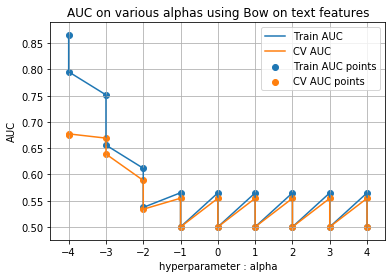

In [65]:
# Please write all the code with proper documentation
Train_data(train_bow,y_train,vectorizer="Bow")

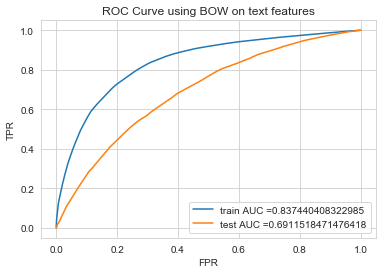

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.5875403060307919 for threshold 0.908
Train confusion matrix
[[ 2059  3109]
 [ 1640 26692]]


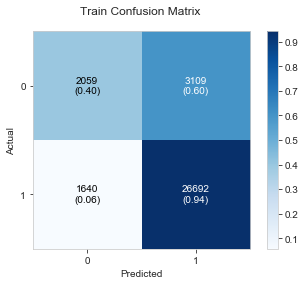

Test confusion matrix
[[  604  1942]
 [ 1046 12908]]


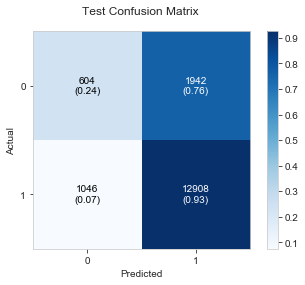

In [76]:
bow_result= Test_Data(train_bow,y_train,test_bow,y_test, best_alpha=0.0001,best_penalty='l2',vectorizer="BOW")

### 2.4.2 Applying SVM on TFIDF,<font color='red'> SET 2</font>

The best parameters for using this model is {'alpha': 0.0001, 'penalty': 'l1'}
Best Estimator  SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


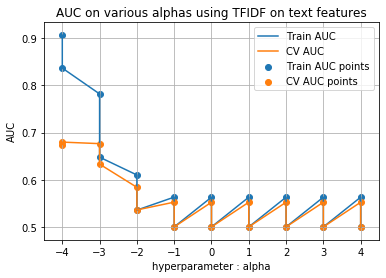

In [67]:
Train_data(train_tfidf,y_train,vectorizer="TFIDF")

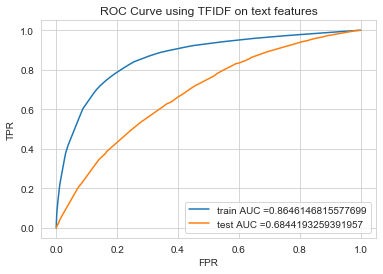

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.6301931099798977 for threshold 0.912
Train confusion matrix
[[ 2305  2863]
 [ 1615 26717]]


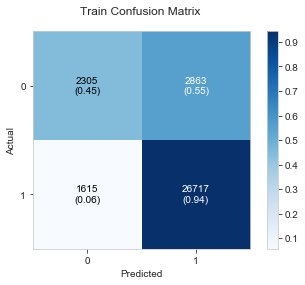

Test confusion matrix
[[  595  1951]
 [ 1073 12881]]


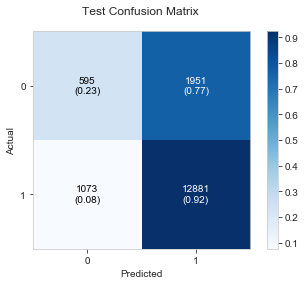

In [77]:
Test_Data(train_tfidf,y_train,test_tfidf,y_test,best_alpha=0.0001,best_penalty='l2',vectorizer="TFIDF")

### 2.4.3 Applying SVM on AVG W2V,<font color='red'> SET 3</font>

The best parameters for using this model is {'alpha': 0.0001, 'penalty': 'l1'}
Best Estimator  SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


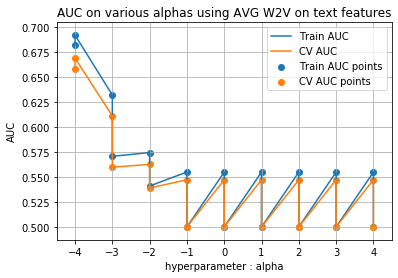

In [69]:
Train_data(train_avg,y_train,vectorizer="AVG W2V")

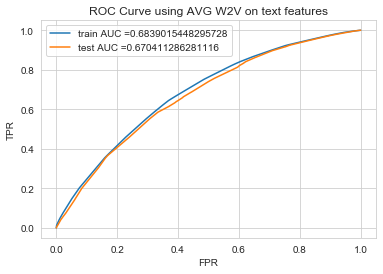

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.40667424597070817 for threshold 0.9
Train confusion matrix
[[  115  5053]
 [  111 28221]]


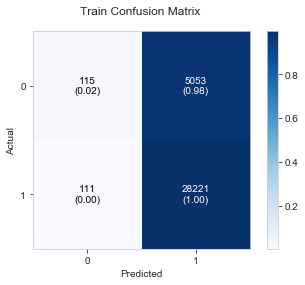

Test confusion matrix
[[   53  2493]
 [   56 13898]]


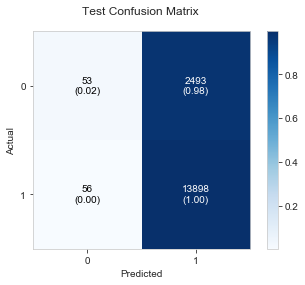

In [78]:
Test_Data(train_avg,y_train,test_avg,y_test,best_alpha=0.0001,best_penalty='l2',vectorizer="AVG W2V")

### 2.4.4 Applying SVM on TFIDF W2V,<font color='red'> SET 4</font>

The best parameters for using this model is {'alpha': 0.001, 'penalty': 'l1'}
Best Estimator  SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


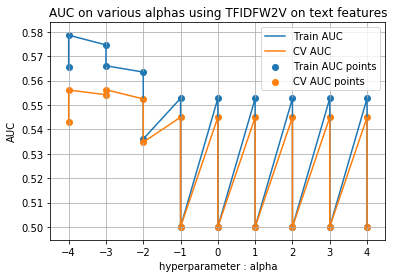

In [71]:
Train_data(train_tfidf_avg,y_train,vectorizer="TFIDFW2V")

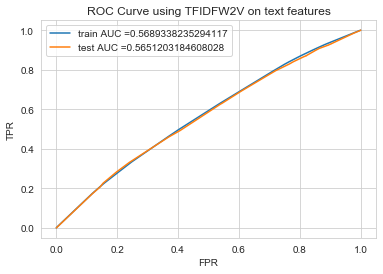

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2973653026214164 for threshold 0.867
Train confusion matrix
[[    2  5166]
 [    2 28330]]


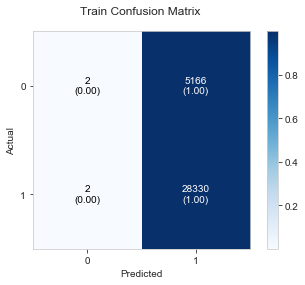

Test confusion matrix
[[    0  2546]
 [    1 13953]]


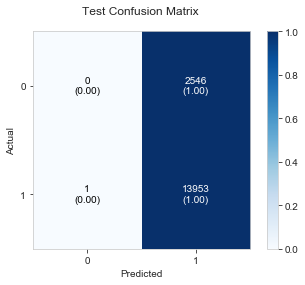

In [79]:
Test_Data(train_tfidf_avg,y_train,test_tfidf_avg,y_test,best_alpha=0.001,best_penalty='l2',vectorizer="TFIDFW2V")

<h2>2.5 Support Vector Machines with added Features `Set 5` </h2>

The best parameters for using this model is {'alpha': 0.0001, 'penalty': 'l2'}
Best Estimator  SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


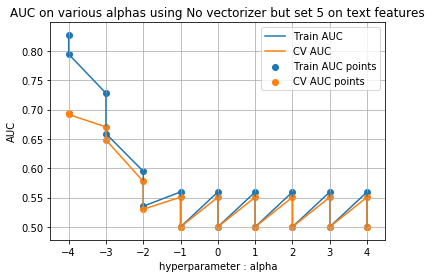

In [73]:
Train_data(train_set5,y_train,vectorizer="No vectorizer but set 5")

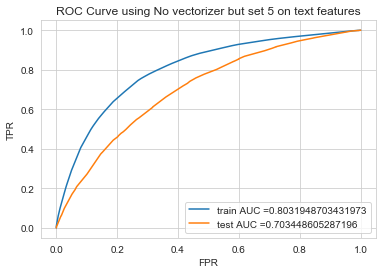

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.5456554584539182 for threshold 0.922
Train confusion matrix
[[ 1390  3778]
 [ 1174 27158]]


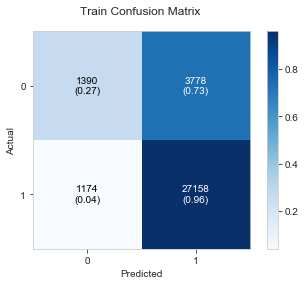

Test confusion matrix
[[  481  2065]
 [  691 13263]]


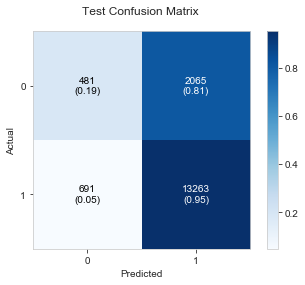

In [80]:
Test_Data(train_set5,y_train,test_set5,y_test,best_alpha=0.0001,best_penalty='l2',vectorizer="No vectorizer but set 5")

<h1>3. Conclusion</h1>

In [81]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
print(table)

+-------------------------+-----------------+--------------------+
|        Vectorizer       | Hyper parameter |        AUC         |
+-------------------------+-----------------+--------------------+
|           BOW           |      0.0001     | 0.6911518471476418 |
|          TFIDF          |      0.0001     | 0.6844193259391957 |
|         AVG W2V         |      0.0001     | 0.670411286281116  |
|         TFIDFW2V        |      0.001      | 0.5651203184608028 |
| No vectorizer but set 5 |      0.0001     | 0.703448605287196  |
+-------------------------+-----------------+--------------------+


1. SVM is able to seperate positive and negative upto some extent. We should try other algorithms
2. To display the hyperparameters in plot clearly, I have taken log value of hyperparameter    
3. Theoritically,lesser alpha value is underfitting and higher alpha value is overfitting,but Gridsearch provides 0.0001 as best hyperparameter for BOW,TFIDF,AVG W2V and set5  and 0.001 for TFIDFW2V by using CV error   
4. Bow, TFIDF and set5 are giving better AUC, considering the hyperparameter and AUC value, 
5. Overall BOW confusion matrix score looks best than BOW and Set5
6. The dataset  is imbalanced, we havnt used undersampling or oversampling, that may also have contributed for the conflicting specificity and sensitivity    
7. We can also conclude most of words used in title/essay of rejected projects looks almost same like approved project